In [1]:
import os
os.getcwd()


'c:\\Users\\pramo\\OneDrive\\Desktop\\mail_spam'

In [2]:
import pandas as pd
mail = pd.read_csv("spam.csv", encoding="latin-1")


In [3]:
mail.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
mail = mail[['v1', 'v2']]


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

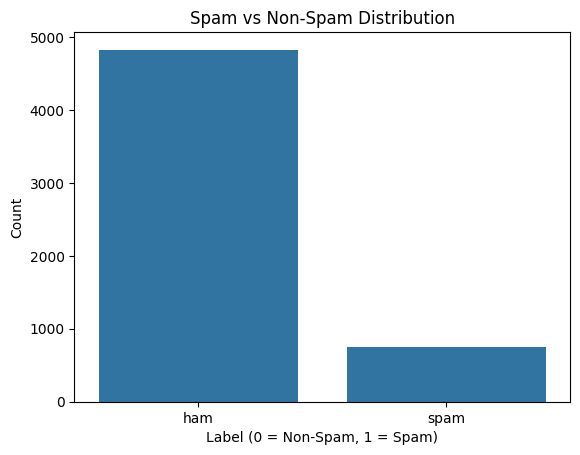

In [6]:
sns.countplot(x='v1', data=mail)
plt.title("Spam vs Non-Spam Distribution")
plt.xlabel("Label (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Count")
plt.show()



In [7]:
mail = mail[['v1', 'v2']]
mail.columns = ['label', 'text']


In [8]:
mail['label'] = mail['label'].map({
    'ham': 0,
    'spam': 1
})


In [9]:
mail.head()
mail['label'].value_counts()


label
0    4825
1     747
Name: count, dtype: int64

In [10]:
spam = mail[mail['label']==1]
ham = mail[mail['label']==0]

print(len(spam))
print(len(ham))

747
4825


In [11]:
ham_sampled = ham.sample(n=len(spam),random_state=1234)


In [12]:
balanced_data = pd.concat([spam, ham_sampled])


In [13]:
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [14]:
balanced_data['label'].value_counts()


label
0    747
1    747
Name: count, dtype: int64

In [15]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


In [16]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pramo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop_words= set(stopwords.words('english'))
stemmer= SnowballStemmer("english")

In [18]:
def preprocess(text):
    text= text.lower()
    text=''.join([char for char in text if char not in string.punctuation])
    words=text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [19]:
balanced_data['clean_text'] = balanced_data['text'].apply(preprocess)


In [20]:
balanced_data[['text','clean_text']].head(20)

,text,clean_text
0,"Sir, Waiting for your mail.",sir wait mail
1,I know girls always safe and selfish know i go...,know girl alway safe selfish know got pa thank...
2,No I'm in the same boat. Still here at my moms...,im boat still mom check yo im half nake
3,Ok then i come n pick u at engin?,ok come n pick u engin
4,I was slept that time.you there?,slept timeyou
5,Want a new Video Phone? 750 anytime any networ...,want new video phone 750 anytim network min ha...
6,I am hot n horny and willing I live local to y...,hot n horni will live local text repli hear st...
7,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",shop till u drop either 10k 5k å£500 cash å£10...
8,Sppok up ur mob with a Halloween collection of...,sppok ur mob halloween collect nokia logop mes...
9,WOW! The Boys R Back. TAKE THAT 2007 UK Tour. ...,wow boy r back take 2007 uk tour win vip ticke...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)


In [22]:
X = vectorizer.fit_transform(balanced_data['clean_text'])
y = balanced_data['label']


In [23]:
print(X.shape,y.shape)

(1494, 3000) (1494,)


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234,stratify=y)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("NB Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))


NB Accuracy: 0.9264214046822743
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       163
           1       0.88      0.97      0.92       136

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



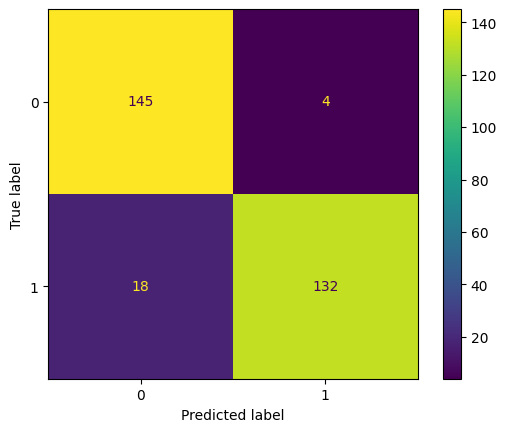

In [26]:
import matplotlib.pyplot as plt
cm= confusion_matrix(y_test, y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [27]:
sample_text = "hi i am pramod kumar please click me and win prizes and upto 1lakh worth gifts click immediately"
sample_clean = preprocess(sample_text)
sample_vector = vectorizer.transform([sample_clean])
spam_probability = model.predict_proba(sample_vector)[0][1] * 100

print(f"Spam Probability: {spam_probability:.2f}%")


Spam Probability: 66.31%


In [28]:
pip install joblib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [29]:
import joblib
joblib.dump(model,"spam_model.pkl")

['spam_model.pkl']

In [30]:
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [31]:
loaded_model = joblib.load("spam_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [32]:
test_text = "hey pk"
test_clean = preprocess(test_text)
test_vec = loaded_vectorizer.transform([test_clean])

prob = loaded_model.predict_proba(test_vec)[0][1] * 100
print(f"Spam Probability: {prob:.2f}%")


Spam Probability: 27.66%


In [33]:
import flask